<a href="https://colab.research.google.com/github/glo-code/ecommerce-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime

In [36]:
df=pd.read_csv('Amazon Sale Report.csv',parse_dates=True,on_bad_lines='skip',low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94426,94426,407-6203656-6522762,06-26-22,Shipped,Amazon,Amazon.in,Expedited,JNE3463,JNE3463-KR-XS,kurta,...,INR,568.00,CHENNAI,TAMIL NADU,600114.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
94427,94427,402-6839959-5605921,06-26-22,Shipped - Picked Up,Merchant,Amazon.in,Standard,SET360,SET360-KR-NP-L,Set,...,INR,1338.00,GURUGRAM,HARYANA,122001.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
94428,94428,406-3977932-3276365,06-26-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3364,JNE3364-KR-1051-L,kurta,...,NaN,NaN,DIBRUGARH,ASSAM,786003.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
94429,94429,171-0103294-9345174,06-26-22,Shipped,Amazon,Amazon.in,Expedited,JNE3487,JNE3487-KR-XL,kurta,...,INR,345.00,MAPUSA,GOA,403507.0,IN,NaN,False,NaN,False




```
Indagine sui clienti


```



Ordine ID e Status

In [37]:
data=pd.to_datetime(df['Date'])
df['months']=data.dt.month_name()
df['year']=data.dt.year
df['day']=data.dt.day


group=df.groupby(['day','months','year'])[['Order ID','Status']].value_counts().reset_index()
mask=np.where(group['count']<group['count'].max())[0]
print('Order less than max:',group['count'].iloc[mask].sum(),'in the day:',group.iloc[mask])
mask2=group['count'][group['count']==group['count'].max()]
'Order == max:',mask2.value_counts(),'in the day:',group.iloc[mask2.index]


<ipython-input-37-c4cc771dfd87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.to_datetime(df['Date'])


Order less than max: 94406 in the day:         day months    year             Order ID                        Status  \
0       1.0  April  2022.0  403-9984530-4477124                       Shipped   
1       1.0  April  2022.0  407-3670630-4326760                       Shipped   
2       1.0  April  2022.0  404-5543645-7254764                       Shipped   
3       1.0  April  2022.0  405-2665944-1819530                       Shipped   
4       1.0  April  2022.0  405-1058598-7066734                       Shipped   
...     ...    ...     ...                  ...                           ...   
88168  31.0    May  2022.0  402-8206702-3368356                       Shipped   
88169  31.0    May  2022.0  402-8049339-9198736  Shipped - Delivered to Buyer   
88170  31.0    May  2022.0  402-8007523-6767567                       Shipped   
88171  31.0    May  2022.0  402-7981079-1184322                       Shipped   
88172  31.0    May  2022.0  408-9910860-9722745                     Ca

('Order == max:',
 count
 12    2
 Name: count, dtype: int64,
 'in the day:',
         day months    year             Order ID     Status  count
 30000  11.0  April  2022.0  403-4984515-8861958    Shipped     12
 31482  11.0    May  2022.0  171-5057375-2831560  Cancelled     12)

Notiamo che il massimo di ordini da parte di un cliente è di 12 mentre il minimo è 1.Il massimo di ordini si è verificato sia ad aprile che a maggio, soltanto che a maggio si è trattato non di ordini spediti ma cancellati dallo stesso cliente.
Abbiamo invece contro i 2 ordini più alti, 91354 ordini minimi da più clienti.


In [38]:
count=group.groupby('months')['Status'].value_counts().unstack()
count=count.fillna(0).astype(int)
count

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller
months,,,,,,,,,,,
April,6726,1,0,27176,11093,2,1,2,6,849,2
June,349,542,262,1573,1,0,0,296,1,0,0
March,18,0,0,123,16,0,0,0,0,1,0
May,5469,6,0,23433,9547,2,1,5,0,661,9


April


ValueError: 'label' must be of length 'x'

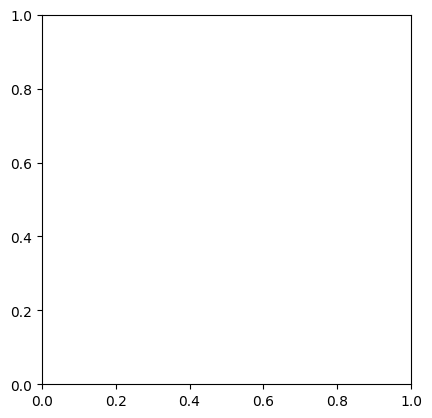

In [40]:
perc_precise=count/count.sum()*100
perc_precise.round(2).reset_index()


labels=set(df['Status'])

conteggio=0
for categorie in perc_precise:
    categorie=perc_precise.iloc[conteggio]
    print(categorie.name)
    ax,fig=plt.subplots()
    plt.pie(categorie,labels=labels,autopct='%1.1f%%')
    conteggio=conteggio+1
    if conteggio==len(perc_precise.index):
       break


Ordini per mese 0     3244
1    41948
2    49067
3      171
dtype: int64
Ordini totali 94430


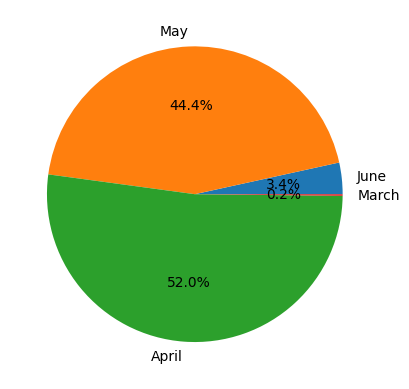

In [41]:
lista_mesi=['June','May','April','March']
ordini_totali=[]
for mese in lista_mesi:
    result=group['count'][group['months']==mese].sum()
    ordini_totali.append(result)

ordini_totali=pd.Series(ordini_totali)
print('Ordini per mese',ordini_totali)
print('Ordini totali',ordini_totali.sum())
perc=ordini_totali/ordini_totali.sum()*100
perc=perc.round(2)

ax,fig=plt.subplots()
plt.pie(perc,labels=lista_mesi,autopct='%1.1f%%')
plt.show()



Notiamo che ad Aprile abbiamo il maggior numero di ordini spediti (17.8%) e cancellati (15,5%). Abbiamo anche un modesto numero di ordini ritornati al venditore e in sospeso(16%). A giugno invece alto numero di ordini spediti ma anche cancellati anche se sono di meno rispetto ad aprile. Pochi però i resi e molti sospesi. A marzo nessun ordine sospeso e pochi cancellati ma ben il 44% degli ordini persi nel transito e 27% cancellati rispetto al 15,5% di aprile. E' il mese in cui si hanno avuti meno ordini. A maggio la maggior parte spediti e cancellati ed un numero moderato minore rispetto ad aprile di resi (21.6% rispetto al 16% di aprile). Pochi sospesi (18% rispetto ad aprile) e il 17% di persi nel transito e cancellati.

Quindi si è venduto di più tra aprile e maggio (47% e 40%) e modertamente a giugno (12%) e di meno a marzo (0.2%).



,Status,count
0,Shipped,58.99
1,Shipped - Delivered to Buyer,23.82
2,Cancelled,14.17
3,Shipped - Returned to Seller,1.70
4,Pending,0.65
5,Shipped - Picked Up,0.34
6,Pending - Waiting for Pick Up,0.30
7,Shipped - Returning to Seller,0.02
8,Shipped - Rejected by Buyer,0.01
9,Shipped - Lost in Transit,0.01


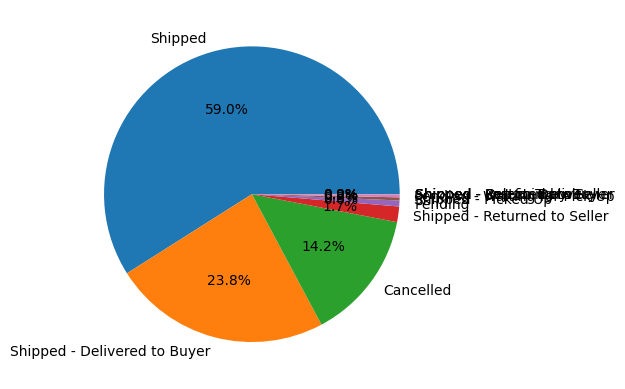

In [42]:
total=df['Status'].value_counts().sum()
status=df['Status'].value_counts().apply(lambda x:x/total*100).round(2).reset_index()
#status=status[status['count']!=0.0]
value=status['count']
fig,ax=plt.subplots()
labels=status['Status']
plt.pie(value,labels=labels,autopct='%1.1f%%')#,startangle=90,shadow=True,labeldistance=0.80,pctdistance=0.5)
status

Notiamo che la maggior parte degli ordini nei mesi indicati, sono stati spediti (circa il 58,8%) mentre il 25 % è stato spedito e consegnato al compratore. Il 14% invece è stato cancellato mentre soltanto 1.8% degli ordini è stato mandato indietro.
Soltanto per il 0,2% invece è stato effettuato il reso ma ancora l'ordine non è ritornato al venditore.



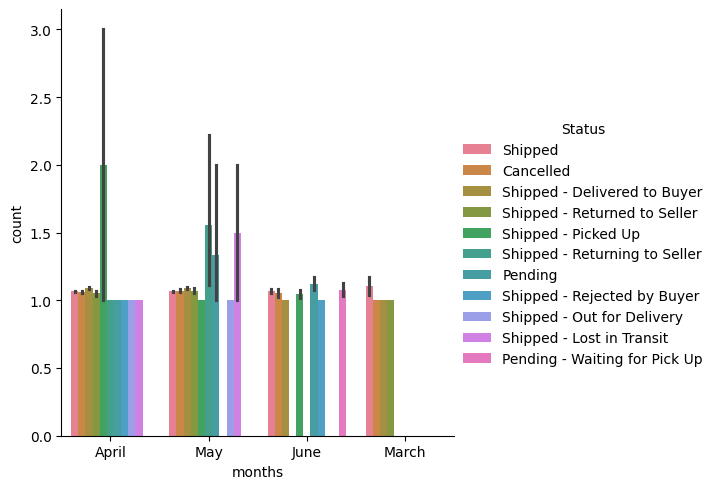

,day,months,year,Order ID,Status,count
0,1.0,April,2022.0,403-9984530-4477124,Shipped,7
1,1.0,April,2022.0,407-3670630-4326760,Shipped,4
2,1.0,April,2022.0,404-5543645-7254764,Shipped,4
3,1.0,April,2022.0,405-2665944-1819530,Shipped,3
4,1.0,April,2022.0,405-1058598-7066734,Shipped,3
...,...,...,...,...,...,...
88168,31.0,May,2022.0,402-8206702-3368356,Shipped,1
88169,31.0,May,2022.0,402-8049339-9198736,Shipped - Delivered to Buyer,1
88170,31.0,May,2022.0,402-8007523-6767567,Shipped,1
88171,31.0,May,2022.0,402-7981079-1184322,Shipped,1


In [43]:

sns.catplot(group,x=group['months'],y=group['count'],kind='bar',hue='Status')
plt.show()
group

Tipo di prodotto acquistato


In [44]:
clothes=df['Category'].value_counts().reset_index()
perc_vestiti=clothes['count']/clothes['count'].sum()*100
vestiti_mesi=df.groupby('Category')['months'].value_counts().unstack()
vestiti_mesi.fillna(0).astype(int)
clothes.sum()

Category    SetkurtaWestern DressTopEthnic DressBlouseBott...
count                                                   94430
dtype: object

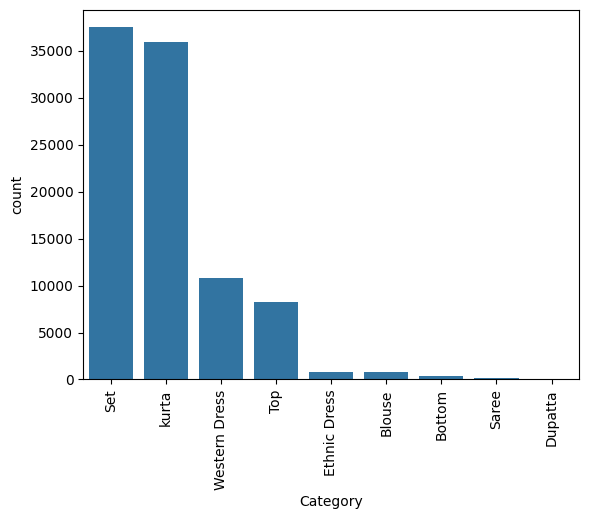

In [45]:
sns.barplot(clothes,x='Category',y='count')
plt.xticks(rotation=90)
plt.show()

Notiamo che i prodotti più acquistati in assoluto sono i set e la kurta e moderatamente il western dress e top. I prodotti meno acquistati sono ethnic dress, blouse, bottom e saree e ancora meno (soltanto 3 acquisti) il dupatta.
Dalle percentuali notiamo che il 39% acquista il set e il 38% il kurta mentre il 12% il western dress e soltanto l'8.2% il top.

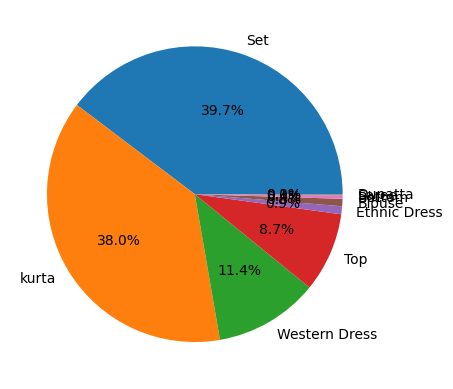

0    39.688658
1    38.038759
2    11.405274
3     8.693212
4     0.871545
5     0.801652
6     0.360055
7     0.137668
8     0.003177
Name: count, dtype: float64

In [46]:
ax,fig=plt.subplots()
plt.pie(perc_vestiti,labels=clothes['Category'],autopct='%1.1f%%')
plt.show()
perc_vestiti

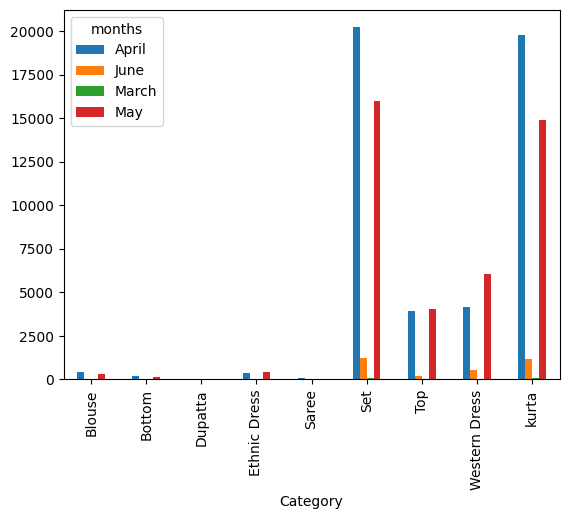

In [47]:
#ax,fig=plt.subplots()
vestiti_mesi.plot(kind='bar')
plt.show()

I set e i kurta sono stati più venduti nel mese di aprile, di più i set e i set anche nel mese di maggio sono stati più venduti rispetto ai kurta, che invece sono stati più venduti durante il mese di giugno. I top e i western dress invece hanno avuto poche vendite rispetto ai set e ai kurta ma i western dress nel mese di maggio e giugno sono stati più venduti rispetto ai top.

In [48]:

taglie=pd.crosstab(df['Category'],[df['Size']]).reset_index()
taglie.round(4)

Size,Category,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,Blouse,0,0,0,0,188,113,118,120,101,23,94
1,Bottom,51,0,0,0,0,53,47,57,48,27,57
2,Dupatta,0,0,0,0,3,0,0,0,0,0,0
3,Ethnic Dress,119,0,0,0,0,144,142,120,133,60,105
4,Saree,0,0,0,0,130,0,0,0,0,0,0
5,Set,4283,37,41,61,0,6051,7027,5811,5547,4037,4583
6,Top,932,0,0,0,0,1349,1378,981,1409,752,1408
7,Western Dress,1370,0,0,0,0,1922,1744,1565,1725,987,1457
8,kurta,4339,255,335,466,0,6530,6030,4095,6245,2256,5369


<Axes: xlabel='Size'>

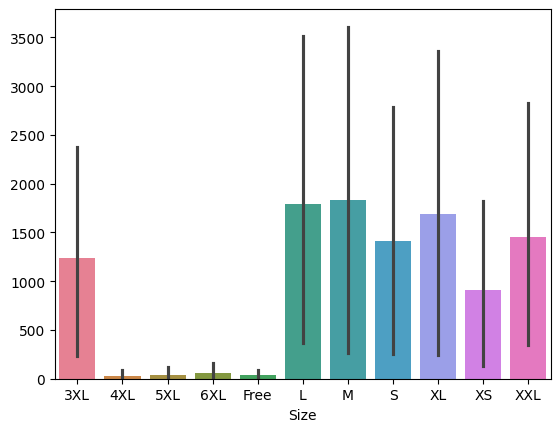

In [49]:
sns.barplot(taglie)

La taglia più venduta è la M/L mentre quella meno venduta è la XS e la 3XL. Mentre le taglie oltre la 3XL sono vendute ancora più raramente e anche la taglia Free.

Spesa


In [50]:
'Il prezzo massimo/minimo e medio sono:',df['Amount'].describe()[['max','min','mean']]
prezzo=df.groupby('months')['Amount'].mean().reset_index()
prezzo

,months,Amount
0,April,626.003046
1,June,673.884355
2,March,627.678086
3,May,663.272456


In [51]:
c=df.groupby('Category')['Amount'].value_counts().unstack()
c.fillna(0).astype(int)

Amount,0.00,199.00,218.10,229.00,236.19,237.14,241.00,246.67,248.00,249.00,...,2655.00,2676.00,2698.00,2796.00,2860.00,2864.00,3036.00,4235.72,5495.00,5584.00
Category,,,,,,,,,,,,,,,,,,,,,
Blouse,17,0,0,1,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
Bottom,6,0,1,14,0,0,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Dupatta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ethnic Dress,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saree,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Set,746,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,1,1
Top,126,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
Western Dress,136,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
kurta,613,3,0,6,2,4,0,6,4,44,...,0,0,0,1,0,0,0,0,0,0


In media i clienti spendono 648,56 dollari per acquistare la merce in totale. Il prezzo medio ad Marzo è stato 627, a Aprile 626 per poi aumentare a Maggio 663 e scendere leggermente a Giugno 661. Quindi in teoria i prezzi sono saliti tra Maggio e Giugno.

Notiamo però che la maggior parte degli acquisti di alcuni articoli sono costati 0.00 e questa è una cosa strana. Anche se notiamo che tra i kurta ben 44 siano stati venduti a 249.00 mentre 14 bottom a 229.00 e 7 blouse a 249.00 ma il resto è minore.
Perchè la maggior parte degli articoli sono stati acquistati gratis?

In [52]:
promozioni=df.groupby('promotion-ids')['Amount'].value_counts().reset_index()
vestiti_promo=df.groupby('promotion-ids')[['Category','months']].value_counts()#.reset_index()#'amount' con category
vestiti_promo_2=vestiti_promo.copy().reset_index()
print(promozioni[promozioni['count']==promozioni['count'].max()])
promo=df['promotion-ids'].value_counts()#.reset_index()
#kurta=vestiti_promo[vestiti_promo['Category']=='kurta']
#kurta[kurta['Amount']==0.0].sum()
set(promozioni[promozioni['Amount']==0.0]['promotion-ids'].value_counts().reset_index()['promotion-ids'])
#set(vestiti_promo['Sales Channel '])
#perc_promo=promo['count']/promo['count'].sum()*100
#promo_1=promo.copy()
#promo_1['count']=perc_promo.round(2)
#promo_1['count'][(promo_1['count']<57.75)&(promo_1['count']>0.0)].sum()

#print(promo.sum())


vestiti_promo.unstack().fillna(0).astype(int)




                                      promotion-ids  Amount  count
18340  IN Core Free Shipping 2015/04/08 23-48-5-108   399.0   1472


months                                                            April  June  \
promotion-ids                                      Category                     
Amazon PLCC Free-Financing Universal Merchant A... Set                0     5   
                                                   Top                0     1   
                                                   kurta              0     1   
Amazon PLCC Free-Financing Universal Merchant A... Ethnic Dress       0     1   
                                                   Set                0     2   
...                                                                 ...   ...   
VPC-44571-41445473 Coupon                          kurta              1     0   
VPC-44571-41445498 Coupon                          Set                1     0   
VPC-44571-41445527 Coupon                          Western Dress      1     0   
VPC-44571-41445561 Coupon                          Top                1     0   
VPC-44571-44201770 Coupon                          kurta              0     5   

months                                                            March  May  
promotion-ids                                      Category                   
Amazon PLCC Free-Financing Universal Merchant A... Set                0    0  
                                                   Top                0    0  
                                                   kurta              0    0  
Amazon PLCC Free-Financing Universal Merchant A... Ethnic Dress       0    0  
                                                   Set                0    0  
...                                                                 ...  ...  
VPC-44571-41445473 Coupon                          kurta              0   35  
VPC-44571-41445498 Coupon                          Set                0   13  
VPC-44571-41445527 Coupon                          Western Dress      0   26  
VPC-44571-41445561 Coupon                          Top                0   23  
VPC-44571-44201770 Coupon                          kurta              0    0  

[6851 rows x 4 columns]

La promozione più utilizzata è VPC-44571-44201853, usata per circa 46100 volte,quindi si tratta di spedizione gratuita (Il numero più alto di articoli acquistati con questa promozione (1754) è costato 399.0 ed in particolare 1687 sono i kurta acquistati 49877 volte (3,38% degli acquisti)).
458 persone hanno invece utilizzato la promozione collegata alle carte platino, attraverso la quale amazon applica lo sconto sull'ordine permettendo però al venditore di ricevere il guadagno completo.
Questa promozione invece è stata utilizzata per comprare i kurta a 0.0 (291 quindi 0.58%) ma è strano perchè dovrebbe trattarsi di una promozione applicabile solo ai vendito
ri.
In generale 781 articoli sono stati venduti per 0.0 (128975 articolo in totale quindi 0,61%) ed è dovuto a tre promozioni sia questa e due coupon che dovrebbero abbassare il prezzo ma non rendere l'articolo gratuito. Sono tutte promozioni provenienti da Amazon.
In totale il 52% degli articoli sono stati comprati tramite la promozione IN Core Free Shipping 2015/04/08 23-48-5-108
come avevamo già notato mentre lo 0,57% con la promozione free-fancing ed anche sullo 0 è la percentuale dei coupon duplicates.


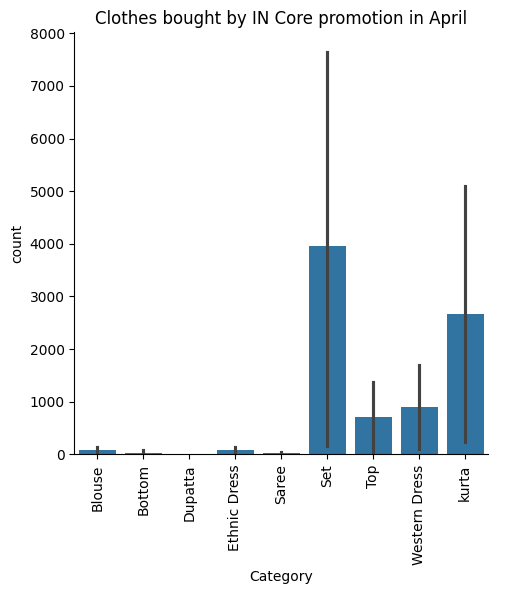

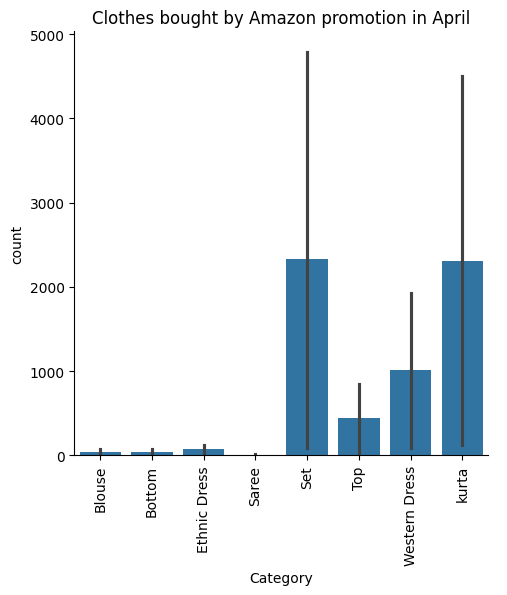

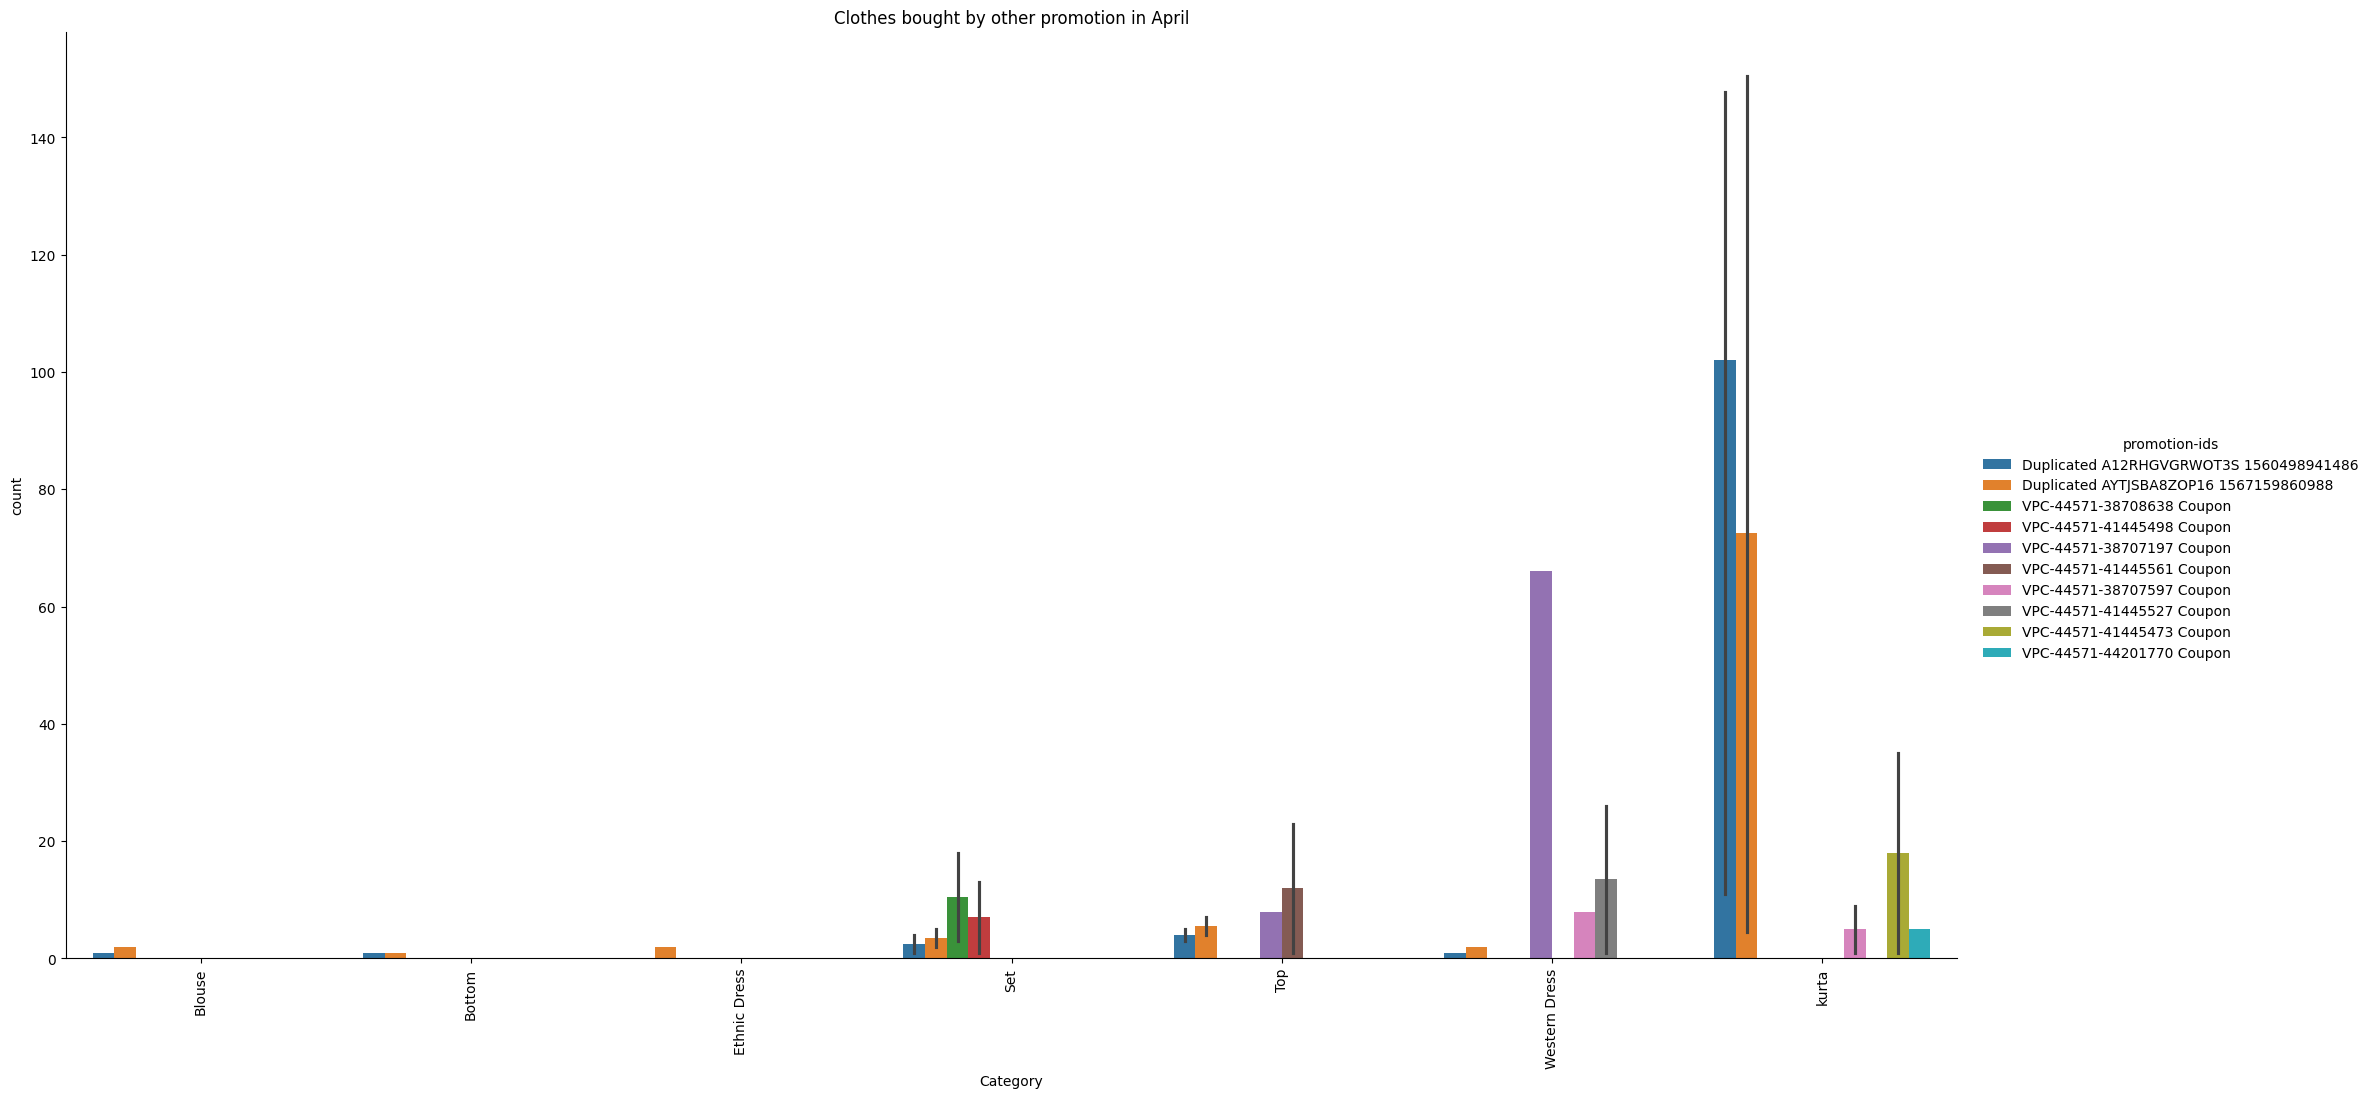

count
Category      promotion-ids                           months       
Blouse        Duplicated A12RHGVGRWOT3S 1560498941486 May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  April       2
Bottom        Duplicated A12RHGVGRWOT3S 1560498941486 May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  April       1
Ethnic Dress  Duplicated AYTJSBA8ZOP16 1567159860988  April       2
                                                      May         2
Set           Duplicated A12RHGVGRWOT3S 1560498941486 April       1
                                                      May         4
              Duplicated AYTJSBA8ZOP16 1567159860988  April       2
                                                      May         5
              VPC-44571-38708638 Coupon               April       3
                                                      May        18
              VPC-44571-41445498 Coupon               April       1
                                                      May        13
Top           Duplicated A12RHGVGRWOT3S 1560498941486 April       5
                                                      May         3
              Duplicated AYTJSBA8ZOP16 1567159860988  April       7
                                                      May         4
              VPC-44571-38707197 Coupon               April       8
              VPC-44571-41445561 Coupon               April       1
                                                      May        23
Western Dress Duplicated A12RHGVGRWOT3S 1560498941486 May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  May         2
              VPC-44571-38707197 Coupon               April      66
              VPC-44571-38707597 Coupon               April       8
              VPC-44571-41445527 Coupon               April       1
                                                      May        26
kurta         Duplicated A12RHGVGRWOT3S 1560498941486 April     147
                                                      June       11
                                                      May       148
              Duplicated AYTJSBA8ZOP16 1567159860988  April     198
                                                      June        8
                                                      March       1
                                                      May        83
              VPC-44571-38707597 Coupon               April       9
                                                      March       1
              VPC-44571-41445473 Coupon               April       1
                                                      May        35
              VPC-44571-44201770 Coupon               June        5

In [53]:
mask=vestiti_promo_2['promotion-ids'].str.contains('IN Core')
in_core=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==True]
coupon=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==False]
coupon=coupon[['promotion-ids','count','Category','months']][coupon['promotion-ids'].str.contains('Amazon')==False]

incore=in_core.groupby(['Category','months'])[['count','promotion-ids']].sum()

coupon=coupon.groupby(['Category','promotion-ids','months'])[['count']].sum()

amazon=vestiti_promo_2['promotion-ids'].str.contains('Amazon')
amazon_1=vestiti_promo_2[['promotion-ids','count','Category','months']][amazon==True]
amazon_2=amazon_1.groupby(['Category','months'])[['count','promotion-ids']].sum()





sns.catplot(incore,kind='bar',x='Category',y='count')
plt.xticks(rotation=90)
plt.title('Clothes bought by IN Core promotion in April')
plt.show()
sns.catplot(amazon_2,kind='bar',x='Category',y='count')
plt.title('Clothes bought by Amazon promotion in April')
plt.xticks(rotation=90)
plt.show()
sns.catplot(coupon,kind='bar',x='Category',y='count',hue='promotion-ids',aspect=2,height=10)
plt.xticks(rotation=90)
plt.title('Clothes bought by other promotion in April')
plt.show()

coupon



In aprile notiamo che le promozioni più usate per comprare (Western Dress) sono le promozioni duplicated. La promozione VCP invece è stata usata moderatamente per i western dress (spedizione gratuita) ma poco per quanto riguarda gli altri articoli come anche duplicated.
Quella di Amazon di più su kurta e set e lo stesso la promozioni IN CORE.


Perchè abbiamo quegli articoli venduti a 0.0?

In [54]:
print(df['Amount'][df['Amount']==0.0].value_counts())
articoli=df.groupby('Amount')[['months','year','Order ID','Status','promotion-ids','Courier Status']].value_counts().reset_index()
nulli=articoli[['Amount','months','year','Status','Order ID','promotion-ids','Courier Status']][articoli['Amount']==0.0]
count_ordini=nulli['months'].value_counts()
print(count_ordini)
lista_guadagno=[]
for months in ['April','May','June']:
    guadagno=df[['Amount','months']][df['months']==months]['Amount'].sum()
    income=[months,guadagno]
    lista_guadagno.append(income)


df_guadagni=pd.DataFrame(lista_guadagno)
df_guadagni

print(nulli['promotion-ids'].value_counts().reset_index()[nulli['promotion-ids'].value_counts().reset_index()['promotion-ids'].str.contains('VPC')]['count'].sum())

nulli['Order ID'].duplicated().value_counts() # non ci sono ordini gratis fatti dallo stesso cliente
stato=nulli['Status'].value_counts()
stato/stato.sum()*100
stato.sum()

nulli['Courier Status'].value_counts()

df['Amount'][df['Amount']==0.0]


Amount
0.0    1666
Name: count, dtype: int64
months
April    323
May      275
June      22
Name: count, dtype: int64
0


212      0.0
374      0.0
385      0.0
388      0.0
392      0.0
        ... 
94011    0.0
94114    0.0
94116    0.0
94177    0.0
94358    0.0
Name: Amount, Length: 1666, dtype: float64

Notiamo che nessuno di questi ordini senza pagamento è stato cancellato e che non ci sono ordini gratis dallo stesso cliente. Questi ordini gratis si sono avuti nel numero massimo ad Aprile mentre moderatamente a Giugno e poco meno a Maggio.
Potrebbero anche essere valori anomali.Comunque ad Aprile si è guadagnato di più mentre a Maggio moderatamente e a Giugno ancora meno. Questi potrebbero essere il motivo di questo calo di fatturato tra Aprile e Giugno?
Notiamo che la maggior parte di questi ordini è stato consegnato al cliente (87%) mentre 50 sono stati resi (6%), 5 sospesi (0.64%), 2 persi nel transito (0.25%) e 2 sono in fase di reso (in totale 57 di questi ordini sono nulli per questo motivo). Nessuno di loro si tratta di ordini cancellati ma 13 sono non spediti
Invece la maggior parte ha utilizzato la promozione Amazon (779) mentre soltanto 2 VCP coupon.
- 57 ordini nulli per reso,sospeso,perso nel transito e in fase di reso su 781 + 13 non spediti (in tutto 8,96%)
- 779 comprati con la promozione Amazon (non sappiamo cosa comporti) su 781 99,74%
- La maggior parte di loro si è avuta nel mese di Aprile
- Potrebbe anche essere un errore, in quanto abbiamo 7795 valori nulli su 128975 incassi 6,54%
- Sono 781 ordini nulli su 128975 ordini in totale (0,61%)


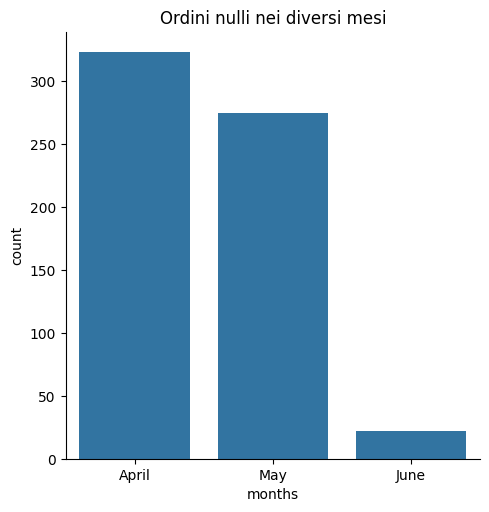

In [55]:


sns.catplot(data=count_ordini,kind='bar')
plt.title('Ordini nulli nei diversi mesi')
plt.show()





Valori anomali e nulli sulla colonna Amount?

In [56]:
df['Amount'].describe()
new_df=df.copy()
#new_df['Amount']=new_df['Amount'][new_df['Amount']!=0.0]
new_df['Amount']

0         647.62
1         406.00
2         329.00
3         753.33
4         574.00
          ...   
94426     568.00
94427    1338.00
94428        NaN
94429     345.00
94430        NaN
Name: Amount, Length: 94431, dtype: float64

In [57]:
df['Amount'][df['Amount'].isnull()==True]
new_df['Amount'].fillna(new_df['Amount'].median())
new_df['Amount'].describe()

count    88751.000000
mean       644.229122
std        278.718839
min          0.000000
25%        446.000000
50%        599.000000
75%        788.000000
max       5584.000000
Name: Amount, dtype: float64

In [58]:
#metodo percentili
sup=df['Amount'].quantile(0.99)
inf=df['Amount'].quantile(0.01)
out=df['Amount'].loc[(df['Amount']>sup)&(df['Amount']<inf)]
out

Series([], Name: Amount, dtype: float64)

In [59]:
#metodo zscore
superiore=df['Amount']+3*df['Amount'].std()
inferiore=df['Amount']-3*df['Amount'].std()
outliers=df['Amount'].loc[(df['Amount']>superiore)&(df['Amount']<inferiore)]
print(outliers)

Series([], Name: Amount, dtype: float64)


In [60]:
index=np.where(new_df['Amount']==0.0)[0]
new_df['free_order']=new_df['Amount'].iloc[index]
new_df['free_order']=new_df['free_order'].fillna('Order not null')
new_df['free_order']=new_df['free_order'].astype(str).replace(0.0,'Order null')
count=new_df['free_order'].iloc[index].value_counts().sum()

new_df['Amount']=new_df['Amount'][new_df['Amount']!=0.0]
print(new_df['free_order'],count,len(df['Amount']),len(new_df['Amount']))

0        Order not null
1        Order not null
2        Order not null
3        Order not null
4        Order not null
              ...      
94426    Order not null
94427    Order not null
94428    Order not null
94429    Order not null
94430    Order not null
Name: free_order, Length: 94431, dtype: object 1666 94431 94431


<ipython-input-68-b50a9130d9c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['outliers']=df['Amount'].iloc[indice]
<ipython-input-68-b50a9130d9c8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['outliers']=new_df['outliers'].fillna('Not outliers')


Valori tolti al di sopra del limite superiore Series([], Name: Amount, dtype: float64)
Numero valori anomali 2224 Lunghezza nuova colonna 7909 0        Not outliers
1        Not outliers
2        Not outliers
3        Not outliers
4        Not outliers
             ...     
94423    Not outliers
94424    Not outliers
94425    Not outliers
94426    Not outliers
94429    Not outliers
Name: outliers, Length: 86522, dtype: object


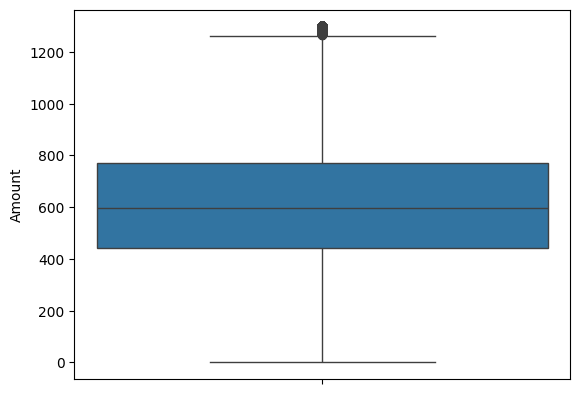

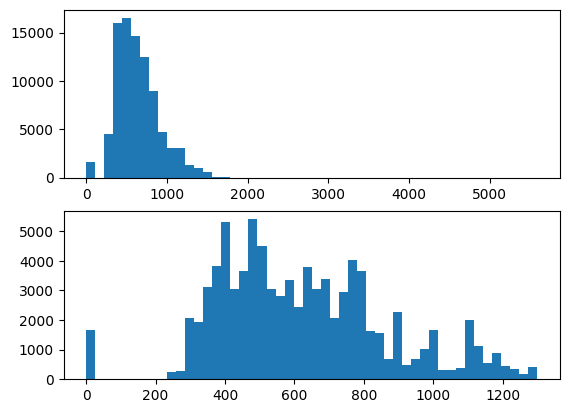

count    88751.000000
mean       644.229122
std        278.718839
min          0.000000
25%        446.000000
50%        599.000000
75%        788.000000
max       5584.000000
Name: Amount, dtype: float64

In [68]:
#metodo interquartile
q1=df['Amount'].quantile(0.25)
q3=df['Amount'].quantile(0.75)
irq=q3-q1
upper=q3+(1.5*irq)
lower=q1-(1.5*irq)
new_df=df.loc[(df['Amount']<upper)&(df['Amount']>lower)]
indice=np.array(df['Amount'][(df['Amount']>upper)&(df['Amount']>lower)].reset_index()['index'])
num=len(indice)
new_df['outliers']=df['Amount'].iloc[indice]
new_df['outliers']=new_df['outliers'].fillna('Not outliers')
print('Valori tolti al di sopra del limite superiore',out)
print('Numero valori anomali',num,'Lunghezza nuova colonna',len(df['Amount'])-len(new_df['Amount']),new_df['outliers'])

sns.boxplot(new_df['Amount'])
plt.plot()
new_df['Amount'].describe()

fig,ax=plt.subplots(2,1)
ax[1].hist(new_df['Amount'],bins=50)
ax[0].hist(df['Amount'],bins=50)
plt.show()
df['Amount'].describe()

In [ ]:
new_df

In [62]:
guadagno=new_df.groupby('months')['Amount'].sum().reset_index()
guadagno_prima=df.groupby('months')['Amount'].sum().reset_index()
print(guadagno)
print(guadagno_prima)
somma2=new_df['Amount'].sum()
somma1=df['Amount'].sum()
print(somma1,somma2)

  months       Amount
0  April  27722867.67
1   June   1929181.79
2  March     98388.85
3    May  24165472.92
  months       Amount
0  April  28838708.32
1   June   2068824.97
2  March    101683.85
3    May  26166761.65
57175978.79 53915911.23


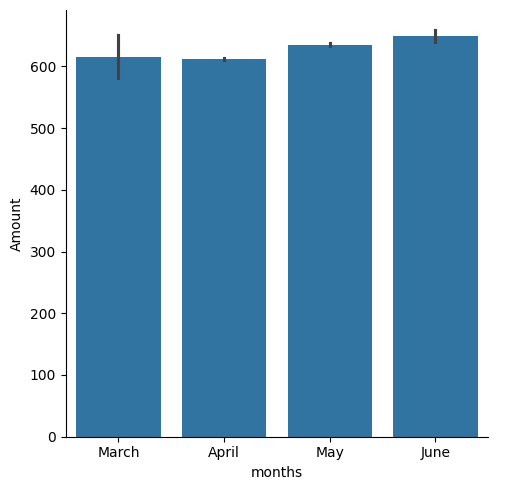

In [63]:
new_df['Amount']
xticks=['March','April','May','June']
sns.catplot(data=new_df,x='months',y='Amount',order=xticks,kind='bar')
plt.show()

- I valori anomali abbassano il guadagno mentre gli ordini gratis non hanno un uguale impatto, anzi lasciano il guadagno invariato (vedremo poi la correlazione).

- Il numero dei valori anomali identificati dall'intervallo interquartile è 3600 su 117580 (3,06%).
Dall'istogramma si nota chiaramente che con i valori anomali l'intervallo dei dati era compreso tra 0 e 15000 e non rappresentava bene i dati, in quanto il massimo era sotto a 15000, ovvero 5584.



- Si è venduto di meno a marzo, picco basso in assoluto, e giugno quindi ai cambiamenti di stagione.

Altri fattori che incidono sul guadagno